In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

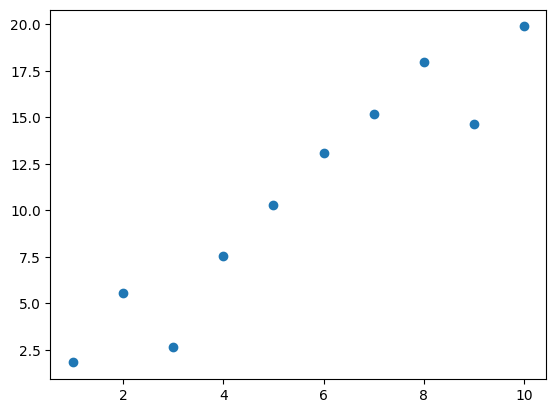

In [3]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

plt.scatter(X[0],X[1])

In [30]:
X[0],X[1]

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 1.81341786,  5.56988476,  2.62704493,  7.53267412, 10.27304526,
        13.10099216, 15.15227475, 17.97825345, 14.65406142, 19.88536869]))

In [2]:
class pca_transform():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]

        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance =self.eigen_values[self.sorted_components[:self.no_of_components]]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
        return self

In [4]:
pca=pca_transform(no_of_components=1)
pca.fit(X.T)

In [6]:
print("eigenvalues: ",pca.eigen_values)
print("eigenvectors: ")
display(pca.eigen_vectors)
print("sorted_components: ",pca.sorted_components)

eigenvalues:  [ 0.66568502 48.38881453]
eigenvectors: 


array([[-0.90656976,  0.422056  ],
       [-0.422056  , -0.90656976]])

sorted_components:  [1 0]


In [7]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.422056   -0.90656976]]
[48.38881453]
[0.98642968]


In [8]:
pca=pca_transform(no_of_components=2)
pca.fit(X.T)

In [9]:
print("eigenvalues: ",pca.eigen_values)
print("eigenvectors: ")
display(pca.eigen_vectors)
print("sorted_components: ",pca.sorted_components)

eigenvalues:  [ 0.66568502 48.38881453]
eigenvectors: 


array([[-0.90656976,  0.422056  ],
       [-0.422056  , -0.90656976]])

sorted_components:  [1 0]


In [10]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.422056   -0.90656976]
 [-0.90656976  0.422056  ]]
[48.38881453  0.66568502]
[0.98642968 0.01357032]


In [12]:
from sklearn.decomposition import PCA
Xcentered = X - X.mean(axis=1, keepdims=True)
#Apply PCA with n_components=1 to transposed Xcentered
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xcentered.T)

In [14]:
pca.explained_variance_ratio_

array([0.98642968, 0.01357032])

In [17]:
#print("eigenvalues: ",pca.eigen_values)
print("eigenvectors: ")
display(pca.components_)
print(pca.explained_variance_ratio_)

eigenvectors: 


array([[-0.422056  , -0.90656976],
       [ 0.90656976, -0.422056  ]])

[0.98642968 0.01357032]


In [18]:
x_pca=pca.transform(Xcentered.T)
#np.dot(Xcentered.T,pca.components_)
x_pca #data_reduced

array([[ 10.09943285,  -0.26194756],
       [  6.27187755,  -0.94081721],
       [  8.51771115,   1.20779577],
       [  3.64836007,   0.04391528],
       [  0.74196646,  -0.20610505],
       [ -2.24382069,  -0.49308725],
       [ -4.52550746,  -0.45227362],
       [ -7.5095103 ,  -0.73842514],
       [ -4.91795433,   1.57113983],
       [-10.08255531,   0.26980495]])

<ipython-input-20-92f9e1a7b44b>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:,0],x_pca[:,1],cmap="plasma")


Text(0.5, 0, 'pca2')

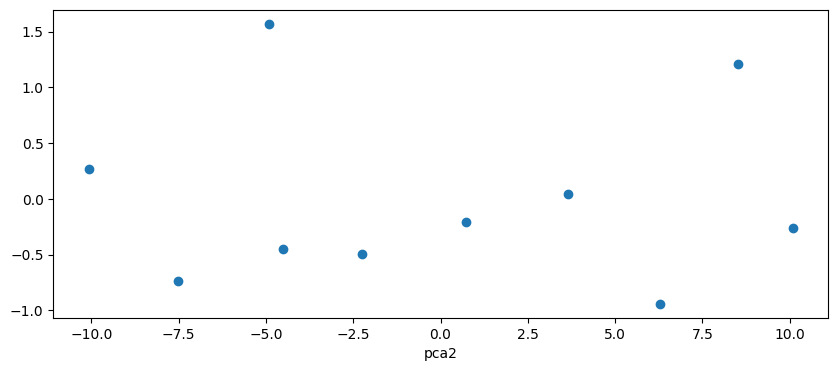

In [20]:
plt.figure(figsize=(10,4))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap="plasma")
plt.xlabel("pca1")
plt.xlabel("pca2")

In [21]:
data_original=np.dot(x_pca,pca.components_)+pca.mean_
data_original

array([[-4.5       , -9.04528388],
       [-3.5       , -5.28881698],
       [-2.5       , -8.23165681],
       [-1.5       , -3.32602762],
       [-0.5       , -0.58565648],
       [ 0.5       ,  2.24229041],
       [ 1.5       ,  4.29357301],
       [ 2.5       ,  7.11955171],
       [ 3.5       ,  3.79535968],
       [ 4.5       ,  9.02666695]])

In [25]:
Xcentered

array([[-4.5       , -3.5       , -2.5       , -1.5       , -0.5       ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ],
       [-9.04528388, -5.28881698, -8.23165681, -3.32602762, -0.58565648,
         2.24229041,  4.29357301,  7.11955171,  3.79535968,  9.02666695]])